In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
avisos_detalle_df = pd.read_csv('fiuba_6_avisos_detalle.csv')
postulaciones_df = pd.read_csv('fiuba_4_postulaciones.csv')
vistas_df = pd.read_csv('fiuba_3_vistas.csv')
postulantes_edu_df = pd.read_csv('fiuba_1_postulantes_educacion.csv')
postulantes_gye_df = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv')

In [3]:
merge_postulantes_df = postulantes_edu_df.merge(postulantes_gye_df, on = 'idpostulante' )
postulantes_edu_df = 0
postulantes_gye_df = 0

In [4]:
merge_postulantes_df.count()#Hay nulos en algunas fechas de nacimiento

idpostulante       298231
nombre             298231
estado             298231
fechanacimiento    294668
sexo               298231
dtype: int64

In [5]:
postulaciones_detalles_df = postulaciones_df.merge(avisos_detalle_df, on ='idaviso')


In [6]:
vistas_df.rename(columns={'idAviso':'idaviso'}, inplace = True)

In [7]:
vistas_detalles_df = vistas_df.merge(avisos_detalle_df, on = 'idaviso')


In [8]:
vistas_detalles_df['timestamp'] = pd.to_datetime(vistas_detalles_df['timestamp'])
#vistas_detalles_df['timestamp'] = vistas_detalles_df['timestamp'].dt.hour

In [9]:
vistas_df['timestamp'] = pd.to_datetime(vistas_df['timestamp'])

In [10]:
postulaciones_df['fechapostulacion'] = pd.to_datetime(postulaciones_df['fechapostulacion'] )

In [11]:
postulaciones_df['fechapostulacion'].dt.month.value_counts()

2    2125425
1    1276198
Name: fechapostulacion, dtype: int64

In [12]:
vistas_df['timestamp'].dt.month.value_counts()

2    921074
3     40823
Name: timestamp, dtype: int64

In [13]:
vistas_df['timestamp'].dt.day.value_counts().sort_index()

1      40823
23     47236
24     95930
25     90646
26    227957
27    232145
28    227160
Name: timestamp, dtype: int64

In [14]:
postulaciones_filtradas_df = postulaciones_df[(postulaciones_df['fechapostulacion'].dt.month == 2 ) & ((postulaciones_df['fechapostulacion'].dt.day > 22) & ( postulaciones_df['fechapostulacion'].dt.day < 29)) ]

In [15]:
from collections import Counter
#Hago una lista con todas las palabras que aparecen en los titulos y sus apariciones, sacando los chars "( ) ,"
contadorPalabrasAvisos = Counter(" ".join(avisos_detalle_df['titulo'].values.tolist()).lower().replace("(",'').replace(")",'').replace(",",' ').split(" ")).items()

contadorPalabrasAvisos_df=pd.DataFrame(contadorPalabrasAvisos)
contadorPalabrasAvisos_df.columns=['palabra','apariciones']
contadorPalabrasAvisos_df=contadorPalabrasAvisos_df.set_index('palabra')

adverbios=['','-','de','con','en','y','a','para','la','al','los','/']
contadorPalabrasAvisos_df=contadorPalabrasAvisos_df.drop(adverbios)


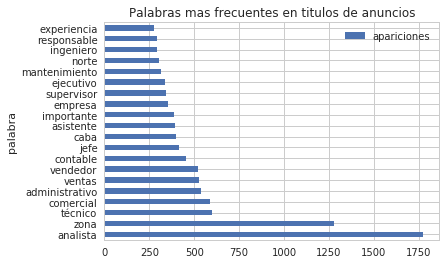

In [16]:

contadorPalabrasAvisos_df.sort_values(by='apariciones',ascending=False).head(20).plot(kind='barh',title='Palabras mas frecuentes en titulos de anuncios')


In [17]:

contadorPalabrasPostulaciones = Counter(" ".join(postulaciones_detalles_df['titulo'].values.tolist()).lower().replace("(",'').replace(")",'').strip(")").replace(")",'').replace(",",' ').split(" ")).items()

contadorPalabrasPostulaciones_df=pd.DataFrame(contadorPalabrasPostulaciones)
contadorPalabrasPostulaciones_df.columns=['palabra','apariciones']
contadorPalabrasPostulaciones_df=contadorPalabrasPostulaciones_df.set_index('palabra')

contadorPalabrasPostulaciones_df=contadorPalabrasPostulaciones_df.drop(adverbios)


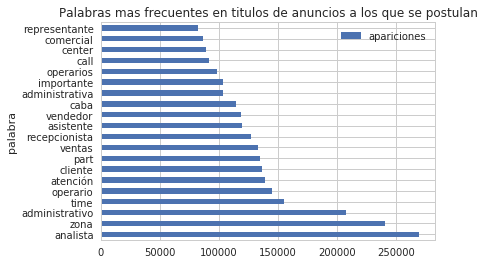

In [18]:
contadorPalabrasPostulaciones_df.sort_values(by='apariciones',ascending=False).head(20).plot(kind='barh',title='Palabras mas frecuentes en titulos de anuncios a los que se postulan')

In [19]:
#me quedo con las palabras que figuran en al menos 20 avisos
contadorPalabrasAvisos_df_filtrado=contadorPalabrasAvisos_df.loc[contadorPalabrasAvisos_df['apariciones']>=20]

efectividad_palabras_df = contadorPalabrasPostulaciones_df.sort_values(by='apariciones',ascending=False) / contadorPalabrasAvisos_df_filtrado.sort_values(by='apariciones',ascending=False)
efectividad_palabras_df = efectividad_palabras_df.dropna()
efectividad_palabras_df.columns=['postulaciones/avisos']

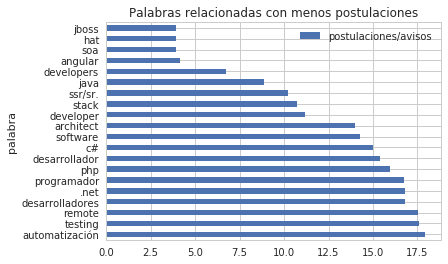

In [20]:
efectividad_palabras_df.sort_values(by='postulaciones/avisos',ascending= False).tail(20).plot(kind='barh',title='Palabras relacionadas con menos postulaciones')

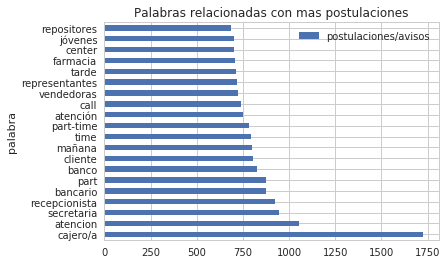

In [21]:
efectividad_palabras_df.sort_values(by='postulaciones/avisos',ascending= False).head(20).plot(kind='barh',title='Palabras relacionadas con mas postulaciones')